### Case Study 1

In [3]:
#Load data
import pandas as pd

df = pd.read_excel('Dataset/credit.xlsx')
df

,Unnamed: 0,Catatan_kredit,Utang,Jaminan,Pendapatan,Risiko
0,1,buruk,rendah,tidak_ada,0-15,tinggi
1,2,tidak_diketahui,tinggi,tidak_ada,15-35,tinggi
2,3,tidak_diketahui,rendah,tidak_ada,15-35,rendah
3,4,buruk,rendah,tidak_ada,0-15,tinggi
4,5,tidak_diketahui,rendah,ada,>35,rendah
...,...,...,...,...,...,...
115,116,baik,tinggi,ada,15-35,rendah
116,117,baik,tinggi,tidak_ada,15-35,rendah
117,118,baik,tinggi,ada,15-35,rendah
118,119,tidak_diketahui,rendah,tidak_ada,15-35,tinggi


In [2]:
# Data preparation (cek tipe data & missing values)
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      120 non-null    int64 
 1   Catatan_kredit  120 non-null    object
 2   Utang           120 non-null    object
 3   Jaminan         120 non-null    object
 4   Pendapatan      120 non-null    object
 5   Risiko          120 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.8+ KB
None
Unnamed: 0        0
Catatan_kredit    0
Utang             0
Jaminan           0
Pendapatan        0
Risiko            0
dtype: int64


In [4]:
#import labelEncoder
from sklearn.preprocessing import LabelEncoder

#konversi nilai variabel ke numerik
label_encoder = LabelEncoder()
categorical_columns = ['Catatan_kredit', 'Utang', 'Jaminan', 'Pendapatan']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [5]:
df

,Unnamed: 0,Catatan_kredit,Utang,Jaminan,Pendapatan,Risiko
0,1,1,0,1,0,tinggi
1,2,2,1,1,1,tinggi
2,3,2,0,1,1,rendah
3,4,1,0,1,0,tinggi
4,5,2,0,0,2,rendah
...,...,...,...,...,...,...
115,116,0,1,0,1,rendah
116,117,0,1,1,1,rendah
117,118,0,1,0,1,rendah
118,119,2,0,1,1,tinggi


In [5]:
#import library split data
from sklearn.model_selection import train_test_split

#Deklarasi data X dan y
X = df.drop('Risiko', axis=1)
y = df['Risiko']

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Membangun Model Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
#Menerapkan model untuk prediksi
y_pred = model.predict(X_test)
print("Predicted Values:")
print(y_pred)
print("Actual Values:")
print(y_test.values)

Predicted Values:
['rendah' 'rendah' 'tinggi' 'rendah' 'rendah' 'rendah' 'rendah' 'tinggi'
 'tinggi' 'tinggi' 'tinggi' 'rendah' 'tinggi' 'tinggi' 'rendah' 'rendah'
 'tinggi' 'tinggi' 'tinggi' 'rendah' 'tinggi' 'tinggi' 'tinggi' 'rendah']
Actual Values:
['tinggi' 'rendah' 'rendah' 'tinggi' 'rendah' 'rendah' 'rendah' 'tinggi'
 'tinggi' 'rendah' 'tinggi' 'rendah' 'tinggi' 'rendah' 'rendah' 'rendah'
 'tinggi' 'tinggi' 'rendah' 'tinggi' 'tinggi' 'tinggi' 'tinggi' 'rendah']


In [8]:
#evaluasi model
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[8 4]
 [3 9]]

Classification Report:
              precision    recall  f1-score   support

      rendah       0.73      0.67      0.70        12
      tinggi       0.69      0.75      0.72        12

    accuracy                           0.71        24
   macro avg       0.71      0.71      0.71        24
weighted avg       0.71      0.71      0.71        24



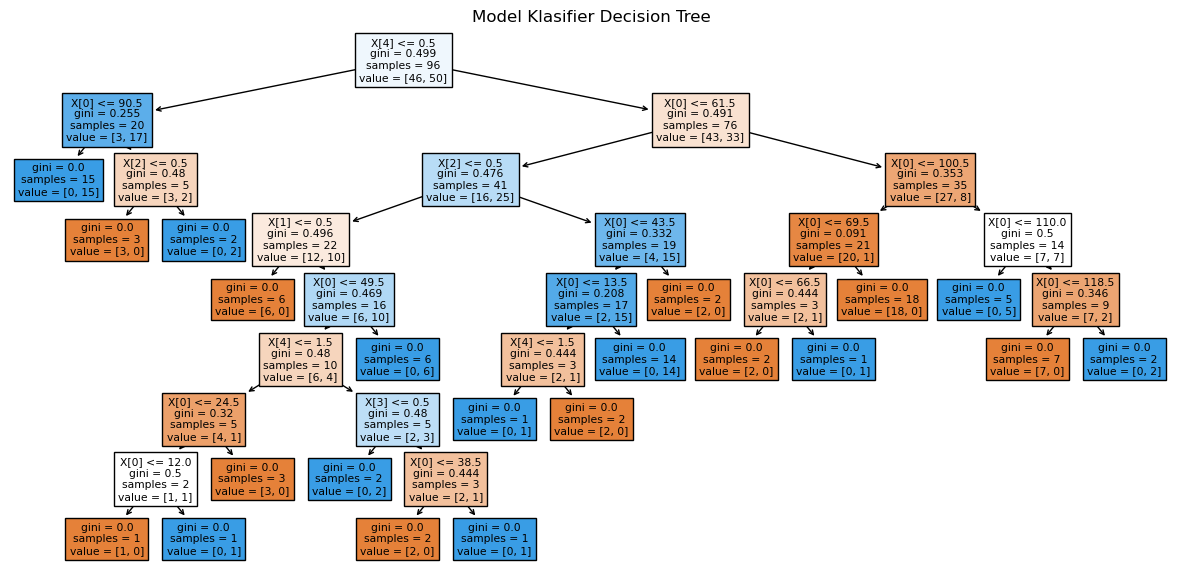

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create plot size 15, 7
plt.figure(figsize=(15, 7))
plot_tree(model, filled=True)
plt.title('Model Klasifier Decision Tree')
plt.show()

### Case Study 2

In [7]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [8]:
# Load dataset
df1 = pd.read_csv('Dataset/Mall_Customers.csv')
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Potential Buy
0,1,Male,19,15,39,Sedang
1,2,Male,21,15,81,Tinggi
2,3,Female,20,16,6,Rendah
3,4,Female,23,16,77,Tinggi
4,5,Female,31,17,40,Sedang
...,...,...,...,...,...,...
195,196,Female,35,120,79,Tinggi
196,197,Female,45,126,28,Sedang
197,198,Male,32,126,74,Tinggi
198,199,Male,32,137,18,Rendah


In [9]:
# Cek Missing Value
print(df1.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Potential Buy             0
dtype: int64


In [10]:
# Label Encoding untuk variabel kategorikal
label_encoder = LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Potential Buy
0,1,1,19,15,39,Sedang
1,2,1,21,15,81,Tinggi
2,3,0,20,16,6,Rendah
3,4,0,23,16,77,Tinggi
4,5,0,31,17,40,Sedang
...,...,...,...,...,...,...
195,196,0,35,120,79,Tinggi
196,197,0,45,126,28,Sedang
197,198,1,32,126,74,Tinggi
198,199,1,32,137,18,Rendah


In [11]:
# Split dataset menjadi data training dan testing
X = df1.drop('Potential Buy', axis=1)
y = df1['Potential Buy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Bangun model klasifikasi (Random Forest sebagai contoh)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(model, X, y, cv=kfold)

In [14]:
results

array([0.775, 0.775, 0.725, 0.75 , 0.75 ])

In [15]:
# Tampilkan hasil validasi
print(f"Accuracy: {results.mean()} (std: {results.std()})")

Accuracy: 0.755 (std: 0.018708286933869726)


In [16]:
# Lakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [19]:
# Tampilkan hasil evaluasi
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8
Confusion Matrix:
[[12  1  0]
 [ 2 14  4]
 [ 3  2 22]]
Classification Report:
              precision    recall  f1-score   support

      Rendah       0.71      0.92      0.80        13
      Sedang       0.82      0.70      0.76        20
      Tinggi       0.85      0.81      0.83        27

    accuracy                           0.80        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60



### Case Study 3

In [17]:
df2 = pd.read_csv("Dataset/indian_liver_patient.csv")
df2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [19]:
# Data preparation
print(df2.info())
print(df2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None
Age                           0
Gender                        0
Total_Bilirubin       

In [30]:
# columns_to_convert = {'Total_Bilirubin': 'str', 'Direct_Bilirubin': 'str', 'Total_Protiens':'str', 'Albumin':'str', 'Albumin_and_Globulin_Ratio':'str'}
# df2 = df2.astype(columns_to_convert)

In [28]:
df2=df2.dropna()

In [30]:
df2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [21]:
X2 = df2.drop(['Gender','Dataset'], axis=1)
X2.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89


In [22]:
y2 = df2['Dataset']
y2

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 579, dtype: int64

In [23]:
# Label Encoding untuk variabel kategorikal
label_encoder = LabelEncoder()
df2['Gender'] = label_encoder.fit_transform(df2['Gender'])
df2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1224\574498935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Gender'] = label_encoder.fit_transform(df2['Gender'])


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [24]:
# Splitting Data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=101)

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Membangun Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X2_train, y2_train)

# Prediksi
y2_pred = nb_model.predict(X2_test)

# Evaluasi model
accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred)
recall = recall_score(y2_test, y2_pred)
f1 = f1_score(y2_test, y2_pred)

# Tampilkan hasil
print(f"Naive Bayes Model:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

Naive Bayes Model:
Accuracy: 0.5517, Precision: 0.9167, Recall: 0.4024, F1-Score: 0.5593
